<a href="https://colab.research.google.com/github/hwangswan/kaggle-digit-recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Numpy
import numpy as np

# Pandas
import pandas as pd

import zipfile

import seaborn as sb


Mounting file from Google Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Unzip sample data

In [3]:
archive = zipfile.ZipFile('/gdrive/MyDrive/Colab Notebooks/digit-recognizer.zip')

for file in archive.namelist():
    archive.extract(file, '/content/data')

In [4]:
train_csv = '/content/data/train.csv'
test_csv = '/content/data/test.csv'

In [5]:
df = pd.read_csv(train_csv)
df.shape

(42000, 785)

In [6]:
X, y = df.drop('label', axis = 1).values, df['label'].values

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
y

array([1, 0, 1, ..., 7, 6, 9])

Split data to train and validate

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
X_train.shape

(28140, 784)

In [11]:
X_test.shape

(13860, 784)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

Plotting some example

6
3
1
1
8
1
3
3
0


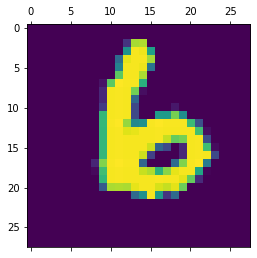

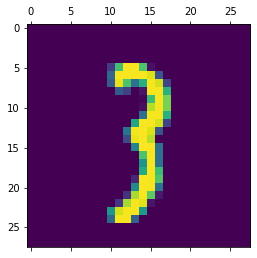

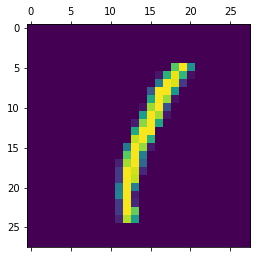

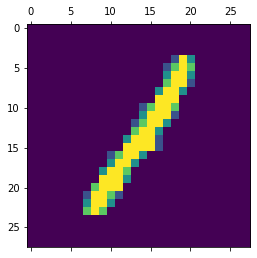

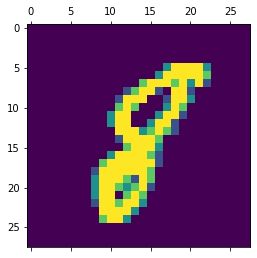

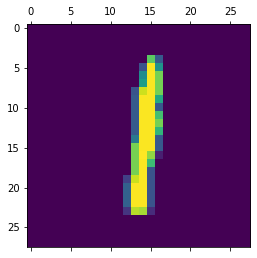

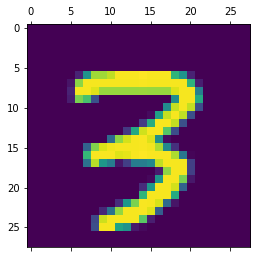

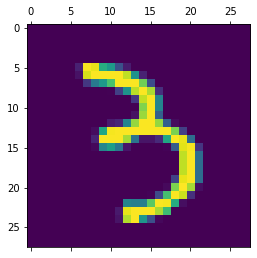

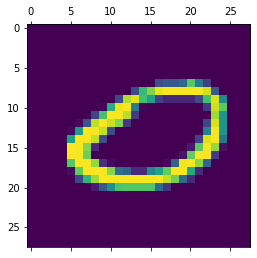

In [13]:
for i in range(1, 10):
    example = np.reshape(X_train[i], (28, 28))
    plt.matshow(example)
    print(y_train[i])

## Training model

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [19]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['sparse_categorical_accuracy']
)

In [20]:
hist = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 16,
    validation_data = (X_test, y_test)
)

Epoch 1/10
1759/1759 [==============================] - 6s 3ms/step - loss: 0.3277 - sparse_categorical_accuracy: 0.9069 - val_loss: 0.1984 - val_sparse_categorical_accuracy: 0.9397
Epoch 2/10
1759/1759 [==============================] - 4s 2ms/step - loss: 0.1548 - sparse_categorical_accuracy: 0.9539 - val_loss: 0.1416 - val_sparse_categorical_accuracy: 0.9586
Epoch 3/10
1759/1759 [==============================] - 5s 3ms/step - loss: 0.1071 - sparse_categorical_accuracy: 0.9685 - val_loss: 0.1269 - val_sparse_categorical_accuracy: 0.9614
Epoch 4/10
1759/1759 [==============================] - 5s 3ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9757 - val_loss: 0.1112 - val_sparse_categorical_accuracy: 0.9658
Epoch 5/10
1759/1759 [==============================] - 7s 4ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.1274 - val_sparse_categorical_accuracy: 0.9619
Epoch 6/10
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0451 - spars

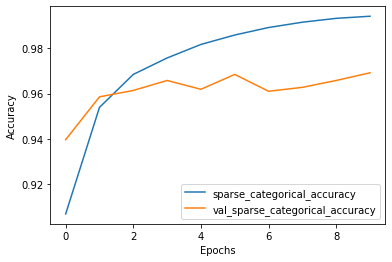

In [21]:
plt.plot(hist.history['sparse_categorical_accuracy'])
plt.plot(hist.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'])

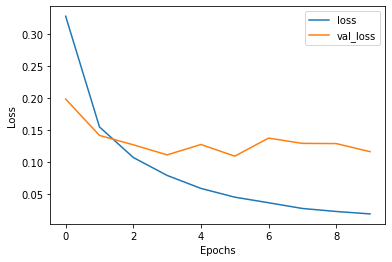

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

## Training result

In [24]:
model.evaluate(X_test, y_test)

434/434 [==============================] - 1s 1ms/step - loss: 0.1162 - sparse_categorical_accuracy: 0.9692


[0.1161782518029213, 0.9691919088363647]

In [25]:
y_test_predicted = model.predict(X_test)
y_test_predicted_labels = [np.argmax(c) for c in y_test_predicted]

In [26]:
confusion_matrix = tf.math.confusion_matrix(
    labels = y_test, predictions = y_test_predicted_labels
)

confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1321,    0,    1,    1,    1,    1,    7,    1,    0,    0],
       [   0, 1507,    3,    1,    0,    2,    1,    2,    3,    1],
       [   7,    8, 1374,    2,    3,    0,    4,    3,    9,    4],
       [   5,    7,   18, 1390,    0,   22,    0,   10,   14,    5],
       [   5,    0,    7,    0, 1306,    2,   14,    3,    1,   20],
       [   3,    2,    0,   12,    0, 1166,   12,    1,    5,    4],
       [   9,    2,    4,    0,    2,    5, 1371,    1,    3,    0],
       [   3,    4,   16,    1,    8,    3,    0, 1430,    2,   13],
       [   1,    9,   15,   11,    3,    8,    9,    2, 1273,    3],
       [   6,    2,    8,    8,    6,   10,    0,    9,    5, 1294]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

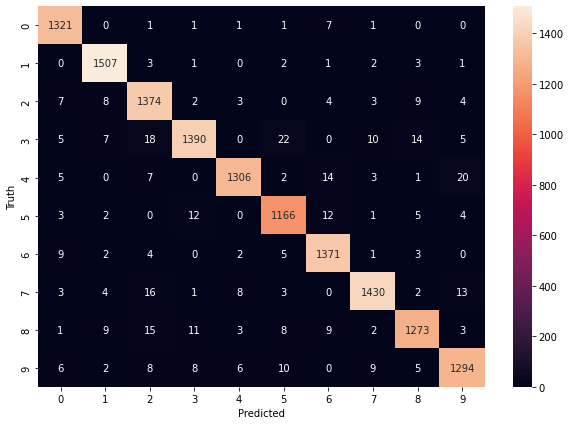

In [27]:
plt.figure(figsize = (10, 7))
sb.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Create submission file

In [28]:
sub_df = pd.read_csv(test_csv)

In [29]:
y_ = model.predict(sub_df.values)
y_predicted_labels = [np.argmax(c) for c in y_]

In [30]:
result_df = pd.DataFrame({
    'ImageId' : list(range(1, len(sub_df) + 1)), 
    'Label' : y_predicted_labels
})

In [31]:
result_df.to_csv('submission.csv', index = False)